In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 110.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 101.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 38.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found ex

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [ ]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.16.1
TensorFlow Decision Forests v1.9.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,RobustScaler
from sklearn.linear_model import LinearRegression
%matplotlib inline
import seaborn as sns
import tensorflow as tf

color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
from scipy import stats
from scipy.stats import norm, skew #for some statistic
from subprocess import check_output

from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# **Load the CSVs :**


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving kc_house_data_NaN Data2.csv to kc_house_data_NaN Data2.csv
Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train_file_path = "/content/train.csv"
df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(df.shape))

Full train dataset shape is (1460, 81)


In [ ]:
# Load the testing dataset
test_df = pd.read_csv('/content/test.csv')  # Update 'test_dataset.csv' with the path to your testing dataset
print("Full train dataset shape is {}".format(df.shape))

Full train dataset shape is (1460, 81)


In [ ]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x)) #Limiting floats output to 3 decimal points


# **Drop ID column**

In [ ]:
train_ID = df['Id']
test_ID = test_df['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

# **Drop Anomalies**
and make good destribution for the data

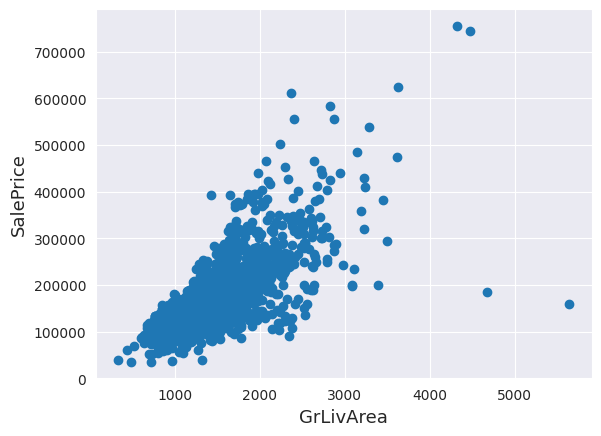

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [ ]:
train = df.drop(df[(df['GrLivArea']>3500) & (df['SalePrice']<250000)].index)


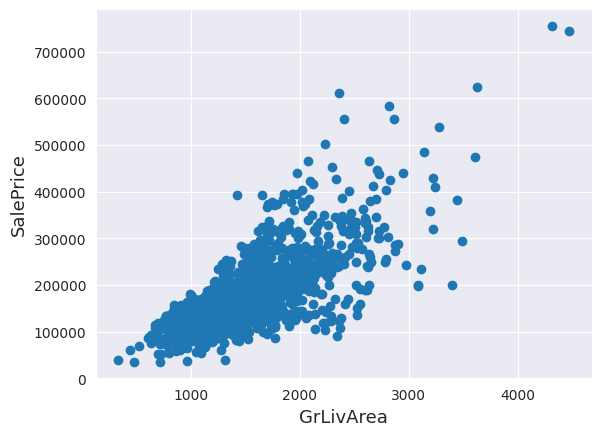

In [ ]:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64


<ipython-input-17-92b9d20aecf4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'],fit=norm, color='b', bins=150, hist_kws={'alpha': 0.5});


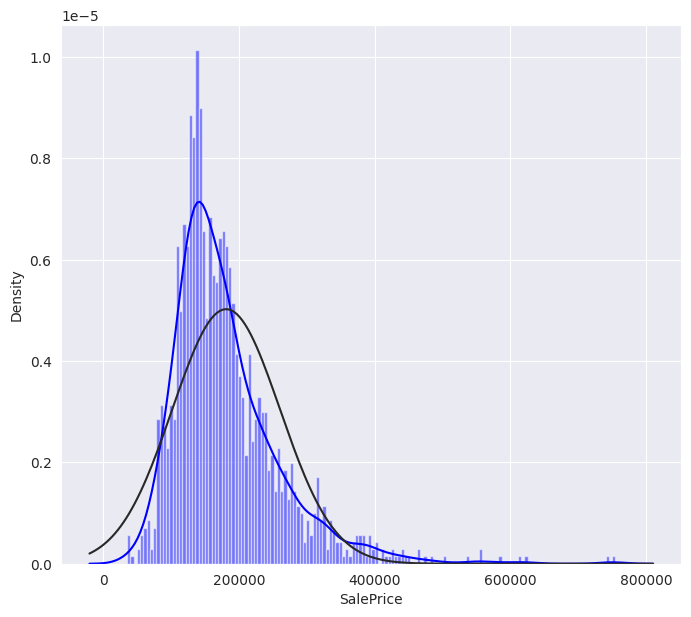

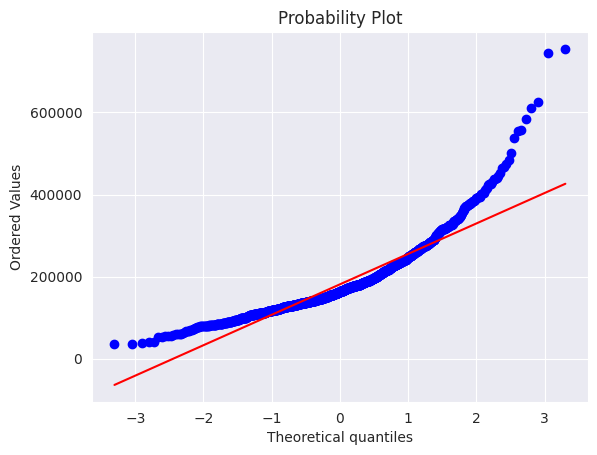

In [ ]:
print(df['SalePrice'].describe())
plt.figure(figsize=(8,7))
sns.distplot(df['SalePrice'],fit=norm, color='b', bins=150, hist_kws={'alpha': 0.5});

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

<ipython-input-18-6735be2426ba>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'] , fit=norm);


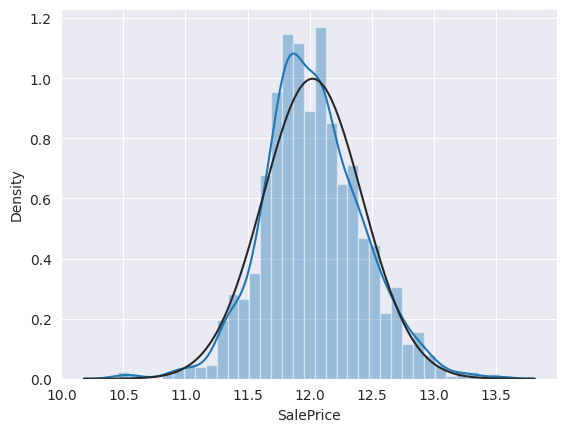

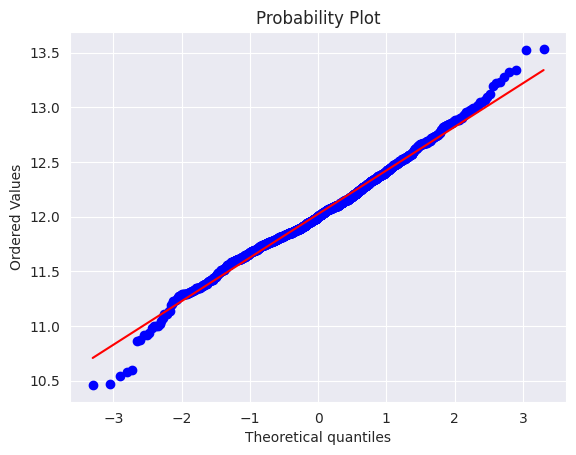

In [ ]:
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution
sns.distplot(train['SalePrice'] , fit=norm);

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# **Now the Data is better to use**
And now we contact test and train files

In [ ]:
ntrain = train.shape[0]
ntest = test_df.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test_df)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


*NAN who mean None "equal 0"*

In [ ]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(10)

,Missing Ratio
PoolQC,99.69
MiscFeature,96.40
Alley,93.21
Fence,80.43
MasVnrType,60.54
FireplaceQu,48.68
LotFrontage,16.66
GarageQual,5.45
GarageYrBlt,5.45
GarageCond,5.45


<ipython-input-21-e07c81555592>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_data_na.index, y=all_data_na, palette= sns.color_palette('viridis', len(all_data_na)))


Text(0.5, 1.0, 'Percent missing data by feature')

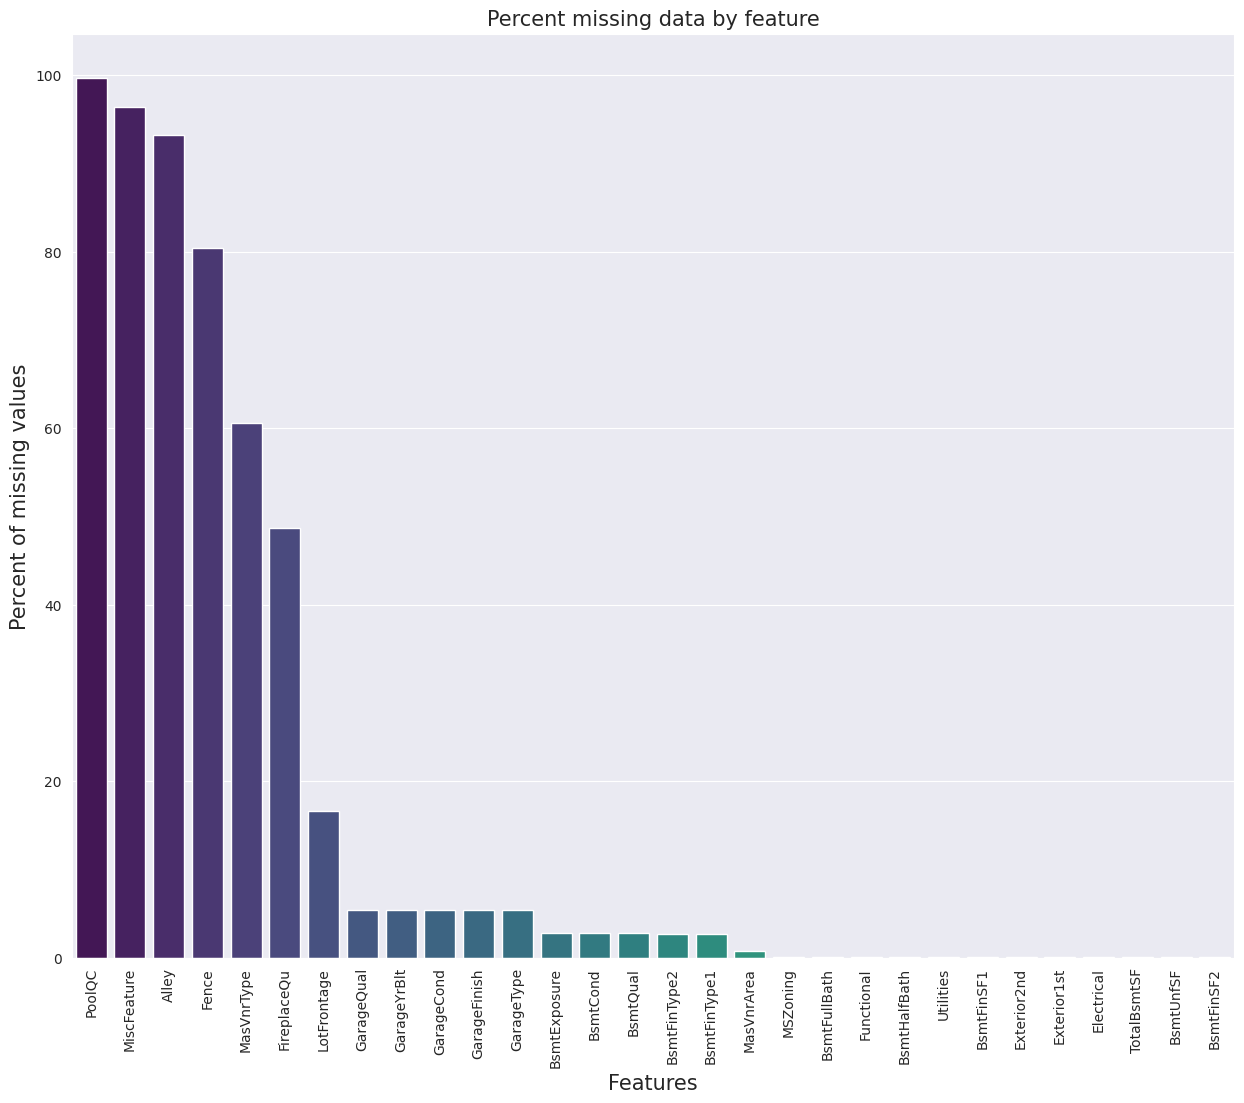

In [ ]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x=all_data_na.index, y=all_data_na, palette= sns.color_palette('viridis', len(all_data_na)))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [ ]:
# make all nan data to none cause it's = 0 not we don't have this data

all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)


In [ ]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])


In [ ]:
all_data = all_data.drop(['Utilities'], axis=1)


In [ ]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [ ]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [ ]:
all_data['CentralAir'] = all_data['CentralAir'].replace({'Y': 1, 'N': 0})
all_data['PavedDrive'] = all_data['PavedDrive'].replace({'Y': 1, 'N': 0})

print(all_data['CentralAir'])
print(all_data['PavedDrive'])

0       1
1       1
2       1
3       1
4       1
       ..
2912    1
2913    1
2914    1
2915    1
2916    1
Name: CentralAir, Length: 2917, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
2912    1
2913    1
2914    1
2915    1
2916    1
Name: PavedDrive, Length: 2917, dtype: object


In [ ]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

#**Who is Corroleted with who**

In [ ]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.00,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.00,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.00,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.00,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.00,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,0,None,None,None,0,12,2008,WD,Normal


In [ ]:
print(train.dtypes)

# Identify and handle categorical columns
categorical_columns = train.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Exclude categorical columns from correlation computation
numeric_columns = train.select_dtypes(include=['int', 'float']).columns
print("Numeric Columns:", numeric_columns)

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 80, dtype: object
Categorical Columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Numeric Colum

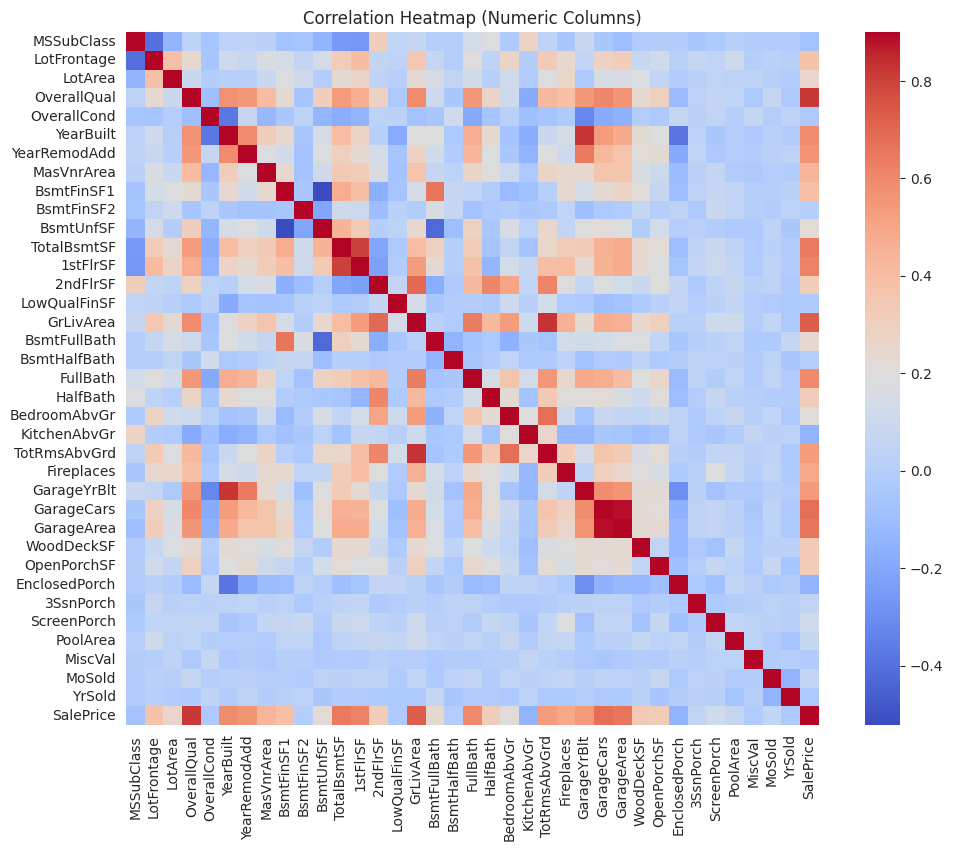

In [ ]:
corrmat = train[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.9, square=True ,cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()

In [ ]:
all_data['CentralAir'].head(1645)

0       1
1       1
2       1
3       1
4       1
       ..
1640    1
1641    1
1642    1
1643    1
1644    1
Name: CentralAir, Length: 1645, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [ ]:
df['totalFlootMeter'] = all_data['1stFlrSF'] + all_data['2ndFlrSF'] + all_data['TotalBsmtSF']

# Drop the original '1stFlrSF' and '2ndFlrSF' columns
#df.drop(['1stFlrSF', '2ndFlrSF','TotalBsmtSF'], axis=1, inplace=True)

*Skew*

In [ ]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.94
PoolArea,17.69
LotArea,13.11
LowQualFinSF,12.08
3SsnPorch,11.37
LandSlope,4.97
KitchenAbvGr,4.30
BsmtFinSF2,4.14
EnclosedPorch,4.00
ScreenPorch,3.95


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 58 skewed numerical features to Box Cox transform


In [ ]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 219)


In [ ]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [ ]:
#X_train = train.drop('SalePrice', axis=1)
#Y_train = train['SalePrice']

In [ ]:
train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=219)

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(train,y_train, test_size=0.2, random_state= 0)

In [ ]:
  model = LinearRegression()
  model.fit(x_train, y_train)

  # Use the model for predictions on the test data
#  y_pred = model.predict(X_test)
  # Create a DataFrame to store the predicted prices

#  predictions_df = pd.DataFrame({'Predicted Price': y_pred})


    # Use the trained model to make predictions on the imputed X_valid and X_test data
y_train_pred = model.predict(x_train)

    # Create a DataFrame to store the predicted prices for the test set
test_predictions_df = pd.DataFrame({'Predicted Price': y_train_pred})

In [ ]:
test_predictions_df

,Predicted Price
0,12.02
1,11.40
2,11.73
3,11.82
4,12.52
...,...
1161,12.46
1162,11.94
1163,12.38
1164,12.08


# **Accuracy**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate model performance on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training Set Mean Squared Error (MSE): {mse_train}")
print(f"Training Set R-squared (R2): {r2_train}")


Training Set Mean Squared Error (MSE): 0.009106209752623816
Training Set R-squared (R2): 0.9420341645233901


In [ ]:
submission_df=pd.read_csv('/content/sample_submission.csv')
submission_df.head()

,Id,SalePrice
0,1461,169277.05
1,1462,187758.39
2,1463,183583.68
3,1464,179317.48
4,1465,150730.08


In [ ]:
sb = submission_df['SalePrice']

In [ ]:
sb = np.log1p(sb)
sb

0      12.04
1      12.14
2      12.12
3      12.10
4      11.92
        ... 
1454   12.03
1455   12.01
1456   12.30
1457   12.13
1458   12.14
Name: SalePrice, Length: 1459, dtype: float64

**Lower values of RMSE indicate better model performance, with a value of 0 indicating perfect predictions.
Lower values of MAPE also indicate better model performance, with a value of 0% indicating perfect predictions (no error relative to actual values).**

In [ ]:

# Compute RMSE
rmse = mean_squared_error(sb, submission_pred, squared=False)  # Set squared=False for RMSE

# Compute MAPE
mape = np.mean(np.abs((sb - submission_pred) / sb)) * 100
print(f"Training (rmse): {rmse}")
print(f"Training  (mape): {mape}")

Training (rmse): 11486321.94740674
Training  (mape): 5174956.515504388


In [ ]:
train_predictions_df = pd.DataFrame({'Actual Price': sb, 'Predicted Price': submission_pred})
train_predictions_df.head(10)

,Actual Price,Predicted Price
0,12.04,11.71
1,12.14,12.04
2,12.12,12.11
3,12.10,12.19
4,11.92,12.22
5,12.08,12.05
6,12.06,12.07
7,12.07,11.97
8,12.00,12.14
9,11.99,11.64


In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier  # Example model import


# Save the model as a pickle file
joblib.dump(model, 'model.pkl')


['model.pkl']